In [1]:
#import necessary packages
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
from pandas_datareader import data

In [2]:
#download Apple price data into DataFrame
apple = data.DataReader('AAPL', 'yahoo',start='1/1/2000')

In [3]:
#calculate the compound annual growth rate (CAGR) which 
#will give us our mean return input (mu) 
days = (apple.index[-1] - apple.index[0]).days
cagr = ((((apple['Adj Close'][-1]) / apple['Adj Close'][1])) ** (365.0/days)) - 1
print ('CAGR =',str(round(cagr,4)*100)+"%")
mu = cagr



#create a series of percentage returns and calculate 
#the annual volatility of returns
apple['Returns'] = apple['Adj Close'].pct_change()
vol = apple['Returns'].std() * np.sqrt(252)
print ("Annual Volatility =",str(round(vol,4)*100)+"%")

CAGR = 25.25%
Annual Volatility = 40.739999999999995%


In [4]:
#Define Variables
S = apple['Adj Close'][-1]         #starting stock price (i.e. last available real stock price)
T = 252                            #Number of trading days
mu = 0.2309                        #Return
vol = 0.4259                       #Volatility

In [5]:
#create list of daily returns using random normal distribution
daily_returns=np.random.normal((mu/T),vol/math.sqrt(T),T)+1

#set starting price and create price series generated by above random daily returns
price_list = [S]


In [6]:
for x in daily_returns:
    price_list.append(price_list[-1]*x)

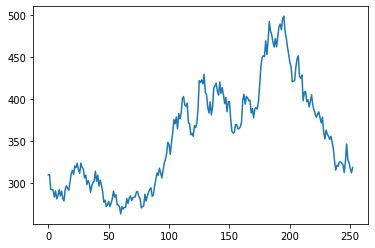

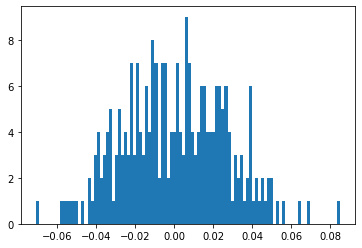

In [7]:
#price_list
#Generate Plots - price series and histogram of daily returns
plt.plot(price_list)
plt.show()
plt.hist(daily_returns-1, 100) #Note that we run the line plot and histogram separately, not simultaneously.
plt.show()

In [8]:
############## MONTE CARLO for lower Volatility #########################

In [9]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm

In [10]:
#set up empty list to hold our ending values for each simulated price series
result = []

#Define Variables
S = apple['Adj Close'][-1] #starting stock price (i.e. last available real stock price)
T = 252 #Number of trading days
mu = 0.2309 #Return
vol = 0.0259 #Volatility

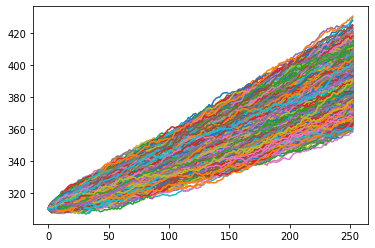

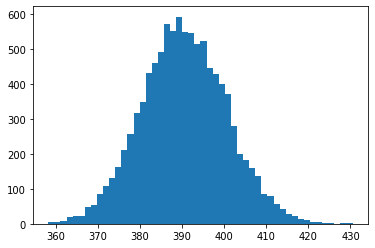

In [11]:
#choose number of runs to simulate - I have chosen 10,000
for i in range(10000):
    #create list of daily returns using random normal distribution
    daily_returns=np.random.normal(mu/T,vol/math.sqrt(T),T)+1
    
    #set starting price and create price series generated by above random daily returns
    price_list = [S]
    
    for x in daily_returns:
        price_list.append(price_list[-1]*x)
    #plot data from each individual run which we will plot at the end
    plt.plot(price_list)
    
    #append the ending value of each simulated run to the empty list we created at the beginning
    result.append(price_list[-1])
#show the plot of multiple price series created above
plt.show()
#create histogram of ending stock values for our mutliple simulations
plt.hist(result,bins=50)
plt.show()

In [13]:
# importing pandas as pd 
import pandas as pd 

# Creating the dataframe 
Date = pd.date_range(start='1/1/2018', end='28/02/2018') 
df = pd.DataFrame([price_list],index=Date) 

# Print the dataframe 
#print(df) 

# Now we will check the data type 
# of the 'Date' column 
#df.info() 

#Drop columns
df.dropna(axis = 1)
#df.index.name = 'date'
voladata = df.rename(columns={0: "BidPrice-AA", 1: "BidVolume-AA",2: "AskPrice-AA", 3: "AskVolume-AA",
                                4: "BidPrice-BB", 5: "BidVolume-BB",6: "AskPrice-BB", 7: "AskVolume-BB",
                                8: "BidPrice-CC", 9: "BidVolume-CC",10: "AskPrice-CC", 11: "AskVolume-CC",
                                12: "BidPrice-DD", 13: "BidVolume-DD",14: "AskPrice-DD", 15: "AskVolume-DD",
                                16: "BidPrice-EE", 17: "BidVolume-EE",18: "AskPrice-EE", 19: "AskVolume-EE",
                                20: "BidPrice-FF", 21: "BidVolume-FF",22: "AskPrice-FF", 23: "AskVolume-FF",
                                24: "BidPrice-GG", 25: "BidVolume-GG",26: "AskPrice-GG", 27: "AskVolume-GG",
                                28: "BidPrice-HH", 29: "BidVolume-HH",30: "AskPrice-HH", 31: "AskVolume-HH",
                                32: "BidPrice-II", 33: "BidVolume-II",34: "AskPrice-II", 35: "AskVolume-II",
                                36: "BidPrice-JJ", 37: "BidVolume-JJ",38: "AskPrice-JJ", 39: "AskVolume-JJ",
                                40: "BidPrice-KK", 41: "BidVolume-KK",42: "AskPrice-KK", 43: "AskVolume-KK",
                                44: "BidPrice-LL", 45: "BidVolume-LL",46: "AskPrice-LL", 47: "AskVolume-LL",
                                48: "BidPrice-MM", 49: "BidVolume-MM",50: "AskPrice-MM", 51: "AskVolume-MM",
                                52: "BidPrice-NN", 53: "BidVolume-NN",54: "AskPrice-NN", 55: "AskVolume-NN",
                                56: "BidPrice-OO", 57: "BidVolume-OO",58: "AskPrice-OO", 59: "AskVolume-OO"}) #rename column
#voladata.columns = [voladata.columns.str[-2:], voladata.columns.str[:-3]]  # arrenge the column

# Show the Stocks
stock_names = list(voladata.columns.get_level_values(0).unique())
print('The stocks available are',stock_names)

The stocks available are ['BidPrice-AA', 'BidVolume-AA', 'AskPrice-AA', 'AskVolume-AA', 'BidPrice-BB', 'BidVolume-BB', 'AskPrice-BB', 'AskVolume-BB', 'BidPrice-CC', 'BidVolume-CC', 'AskPrice-CC', 'AskVolume-CC', 'BidPrice-DD', 'BidVolume-DD', 'AskPrice-DD', 'AskVolume-DD', 'BidPrice-EE', 'BidVolume-EE', 'AskPrice-EE', 'AskVolume-EE', 'BidPrice-FF', 'BidVolume-FF', 'AskPrice-FF', 'AskVolume-FF', 'BidPrice-GG', 'BidVolume-GG', 'AskPrice-GG', 'AskVolume-GG', 'BidPrice-HH', 'BidVolume-HH', 'AskPrice-HH', 'AskVolume-HH', 'BidPrice-II', 'BidVolume-II', 'AskPrice-II', 'AskVolume-II', 'BidPrice-JJ', 'BidVolume-JJ', 'AskPrice-JJ', 'AskVolume-JJ', 'BidPrice-KK', 'BidVolume-KK', 'AskPrice-KK', 'AskVolume-KK', 'BidPrice-LL', 'BidVolume-LL', 'AskPrice-LL', 'AskVolume-LL', 'BidPrice-MM', 'BidVolume-MM', 'AskPrice-MM', 'AskVolume-MM', 'BidPrice-NN', 'BidVolume-NN', 'AskPrice-NN', 'AskVolume-NN', 'BidPrice-OO', 'BidVolume-OO', 'AskPrice-OO', 'AskVolume-OO', 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 

In [14]:
price= voladata.resample('5Min').ffill()
price_round = price.round(2)
price_round

,BidPrice-AA,BidVolume-AA,AskPrice-AA,AskVolume-AA,BidPrice-BB,BidVolume-BB,AskPrice-BB,AskVolume-BB,BidPrice-CC,BidVolume-CC,...,243,244,245,246,247,248,249,250,251,252
2018-01-01 00:00:00,102.84,103.2,103.27,103.43,103.48,103.05,103.05,103.31,103.16,103.17,...,134.05,134.07,134.33,134.36,134.28,134.5,134.99,135.2,135.42,135.65
2018-01-01 00:05:00,102.84,103.2,103.27,103.43,103.48,103.05,103.05,103.31,103.16,103.17,...,134.05,134.07,134.33,134.36,134.28,134.5,134.99,135.2,135.42,135.65
2018-01-01 00:10:00,102.84,103.2,103.27,103.43,103.48,103.05,103.05,103.31,103.16,103.17,...,134.05,134.07,134.33,134.36,134.28,134.5,134.99,135.2,135.42,135.65
2018-01-01 00:15:00,102.84,103.2,103.27,103.43,103.48,103.05,103.05,103.31,103.16,103.17,...,134.05,134.07,134.33,134.36,134.28,134.5,134.99,135.2,135.42,135.65
2018-01-01 00:20:00,102.84,103.2,103.27,103.43,103.48,103.05,103.05,103.31,103.16,103.17,...,134.05,134.07,134.33,134.36,134.28,134.5,134.99,135.2,135.42,135.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-27 23:40:00,102.84,103.2,103.27,103.43,103.48,103.05,103.05,103.31,103.16,103.17,...,134.05,134.07,134.33,134.36,134.28,134.5,134.99,135.2,135.42,135.65
2018-02-27 23:45:00,102.84,103.2,103.27,103.43,103.48,103.05,103.05,103.31,103.16,103.17,...,134.05,134.07,134.33,134.36,134.28,134.5,134.99,135.2,135.42,135.65
2018-02-27 23:50:00,102.84,103.2,103.27,103.43,103.48,103.05,103.05,103.31,103.16,103.17,...,134.05,134.07,134.33,134.36,134.28,134.5,134.99,135.2,135.42,135.65
2018-02-27 23:55:00,102.84,103.2,103.27,103.43,103.48,103.05,103.05,103.31,103.16,103.17,...,134.05,134.07,134.33,134.36,134.28,134.5,134.99,135.2,135.42,135.65


In [15]:
#print(market_data)
#market_data = voladata.loc[:,['AA', 'BB', 'CC', 'DD', 'EE', 'FF', 'GG', 'HH', 'II', 'JJ', 'KK', 'LL', 'MM', 'NN', 'OO']]
price_round.to_csv("lower_vol.csv")